In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

df = pd.read_csv('AviationDataCleaned_RecommendedMakes.csv',index_col=0)

%matplotlib inline

In [61]:
df.rename(columns={"Unnamed: 0":"F1"},inplace=True)
df.columns

Index(['F1', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Schedule', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Year', 'Make and Model',
       'Total_passengers', 'Fatality_Pecentage', 'Serious_Inj_Percentage',
       'Minor/NonInj_Percentage'],
      dtype='object')

In [65]:
"""
Creating a subset of the DF that has only US accidents
"""
df_us = df[df['Country'] == 'United States']
df_us.reset_index(drop=True, inplace=True)

df_us = df_us.copy()

df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   F1                       1566 non-null   int64  
 1   Investigation.Type       1566 non-null   object 
 2   Event.Date               1566 non-null   object 
 3   Location                 1565 non-null   object 
 4   Country                  1566 non-null   object 
 5   Injury.Severity          1566 non-null   object 
 6   Aircraft.damage          1026 non-null   object 
 7   Aircraft.Category        512 non-null    object 
 8   Make                     1566 non-null   object 
 9   Model                    1566 non-null   object 
 10  Amateur.Built            1564 non-null   object 
 11  Number.of.Engines        1508 non-null   float64
 12  Engine.Type              1462 non-null   object 
 13  Schedule                 1175 non-null   object 
 14  Total.Fatal.Injuries    

In [52]:
"""
Create City and State columns based on the Location column -- 

First we need a list of valid state codes to verify that the location has a valid US state (plus PR)

"""
states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

state_region_map = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast',
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'NJ': 'Northeast',
    'WI': 'Midwest', 'MI': 'Midwest', 'IL': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South', 'WV': 'South', 'NC': 'South', 'SC': 'South', 
    'GA': 'South', 'FL': 'South', 'KY': 'South', 'TN': 'South', 'MS': 'South', 'AL': 'South', 'OK': 'South', 
    'TX': 'South', 'AR': 'South', 'LA': 'South',
    'ID': 'West', 'MT': 'West', 'WY': 'West', 'NV': 'West', 'UT': 'West', 'CO': 'West', 'AZ': 'West', 
    'NM': 'West', 'AK': 'West', 'WA': 'West', 'OR': 'West', 'CA': 'West', 'HI': 'West'
}

def city_state(location):
    if pd.notna(location):
        location = location.strip()
        state = location[-2:].upper()
        city = location[:-4].strip().title()
        if state in states:
            return city, state
        else:
            return location, "No State"
    else:
        return np.nan, np.nan

df_us[['City', 'State']] = df_us['Location'].apply(city_state).apply(pd.Series)

df_us['Region'] = df_us['State'].apply(lambda x: state_region_map.get(x))

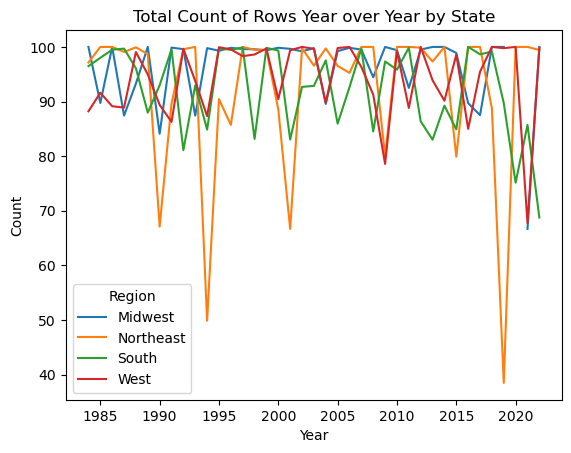

In [53]:
df_us = df_us[(df_us['State'] != 'No State') & (df_us['Year']>=1984)]

grouped_data = df_us.groupby(['Year', 'Region'])['Minor/NonInj_Percentage'].mean().reset_index(name='Count')

pivot_data = grouped_data.pivot(index='Year', columns='Region', values='Count')

# accidents_by_year
pivot_data.plot(kind='line')  # Use 'bar' for bar plot
plt.title('Total Count of Rows Year over Year by State')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()


In [54]:
df_us.to_csv('US_Accidents.csv')

In [55]:
minor = df_us.groupby(['Region'])['Minor/NonInj_Percentage'].mean().to_frame()
major = df_us.groupby(['Region'])['Serious_Inj_Percentage'].mean().to_frame()
fatal = df_us.groupby(['Region'])['Fatality_Pecentage'].mean().to_frame()
totals = df_us.groupby(['Region']).size()

In [56]:
col_selector = ['Region', 'Minor/NonInj_Percentage', 'Serious_Inj_Percentage', 'Fatality_Pecentage']
total_new = df_us[col_selector].groupby('Region').mean()
# total_new['Total'] = totals

total_new

,Minor/NonInj_Percentage,Serious_Inj_Percentage,Fatality_Pecentage
Region,,,
Midwest,95.797197,3.093118,1.109684
Northeast,92.189695,2.589513,5.220792
South,93.116028,4.279733,2.604239
West,93.912357,3.264940,2.822703


<BarContainer object of 4 artists>

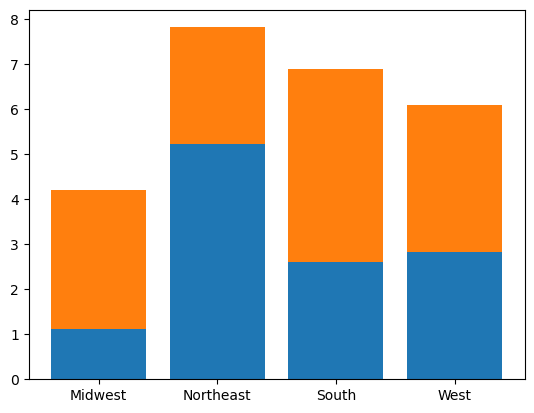

In [57]:
plt.bar(total_new.index, total_new['Fatality_Pecentage'])

plt.bar(total_new.index, total_new['Serious_Inj_Percentage'], label='Serious Injury Percentage', bottom=total_new['Fatality_Pecentage'])


In [58]:
melted_df = total_new.melt(var_name='Category', value_name='Value')

melted_df

,Category,Value
0,Minor/NonInj_Percentage,95.797197
1,Minor/NonInj_Percentage,92.189695
2,Minor/NonInj_Percentage,93.116028
3,Minor/NonInj_Percentage,93.912357
4,Serious_Inj_Percentage,3.093118
5,Serious_Inj_Percentage,2.589513
6,Serious_Inj_Percentage,4.279733
7,Serious_Inj_Percentage,3.264940
8,Fatality_Pecentage,1.109684
9,Fatality_Pecentage,5.220792


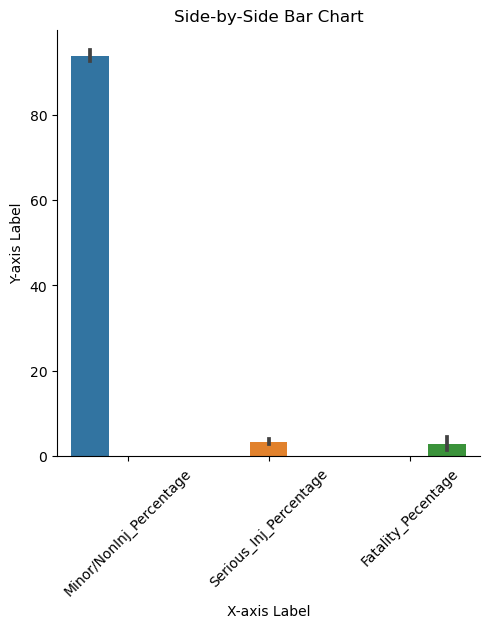

In [59]:
melted_df = total_new.melt(var_name='Category', value_name='Value')

# Create a bar plot with catplot
sns.catplot(x='Category', y='Value', hue='Category', data=melted_df, kind='bar')

# Adding labels and title
plt.xlabel('X-axis Label')
plt.xticks(rotation=45)
plt.ylabel('Y-axis Label')
plt.title('Side-by-Side Bar Chart')

# Display the plot

plt.show()

TypeError: 'int' object is not callable